In [1]:
from cells_simulation import *

In [2]:
    parameter_set = {   "mean_lambda": 0.01, 
                        "gamma_lambda": 0.01,
                        "var_lambda": 1e-7,
                        "mean_q": 10,
                        "gamma_q": 1e-2,
                        "var_q": 0.1,
                        "beta": 0.001, 
                        "var_x": 1e-3,
                        "var_g": 5000,
                        "var_dx": 0.001,
                        "var_dg": 500}

In [12]:
def norm_corr(a, b):
    return (np.mean(a*b) - np.mean(a)*np.mean(b))/(np.std(a)*np.std(b))

def auto_corr(a, taumax, dt=1.):
    auto_corrs = [norm_corr(a, a)]
    for tau in np.arange(1,taumax):
        ac = norm_corr(a[tau:], a[:-tau])
        auto_corrs.append(ac)
    time = [t*dt for t in range(len(auto_corrs))]
    return time, auto_corrs

def linear(x, a, b):
    return a*np.array(x) + b

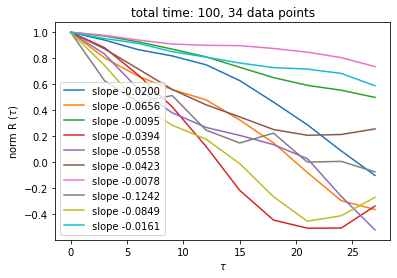

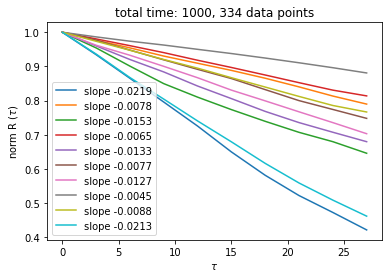

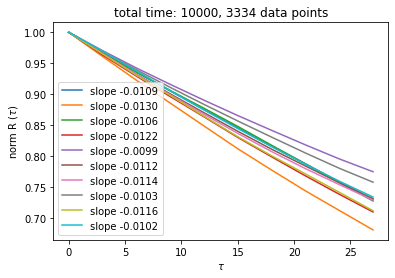

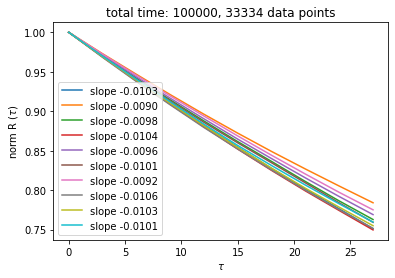

In [63]:
tot_t = 1e3
for tot_t in [1e2, 1e3, 1e4, 1e5]:
    for i in range(10):
        lt = [parameter_set['mean_lambda']]
        dt = 1e-2
        for i in range(int(tot_t/dt)):
            lambda_ou = single_ou_step(dt,  parameter_set['mean_lambda'], 
                                    parameter_set['gamma_lambda'], 
                                    parameter_set['var_lambda'], 
                                    lt[-1]) 
            lt.append(lambda_ou)
        lt = np.array(lt)[::int(3/dt)]

        t, a = auto_corr(lt, 10, dt=3)
        slope = (a[0]-a[1])/(t[0]-t[1]) 
        plt.plot(t,a, label="slope {:.4f}".format(slope))
        plt.xlabel(r"$\tau$")
        plt.ylabel(r"norm R ($\tau$)")
        plt.title("total time: {:.0f}, {:d} data points".format(tot_t, len(lt)))
        plt.legend()
    plt.show()
